### Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\gaby9\AppData\Local\Temp\ipykernel_8732\2085782635.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Metodología

#### Recolectar 

In [2]:
'''
Features:
id: An identifier for each individual in the dataset.
age: The age of the individual (in days).
gender: Gender (1 for female, 2 for male).
height: Height in centimeters.
weight: Weight in kilograms.
ap_hi: Systolic blood pressure (measured in mmHg).
ap_lo: Diastolic blood pressure (measured in mmHg).
cholesterol: Cholesterol level (1, 2, or 3). {1: normal, 2: above normal, 3: well above normal}
smoke: Whether the individual smokes (0 for no, 1 for yes).
'''
df = pd.read_csv("C:/Users/gaby9/Downloads/data/cardio_base.csv")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1
69996,99995,22601,1,158,126.0,140,90,2,0
69997,99996,19066,2,183,105.0,180,90,3,0
69998,99998,22431,1,163,72.0,135,80,1,0


#### Preparar

##### Modificación de columna 'Age'

In [3]:
#Convert the age in days to years by dividing with 365
cardio_base = df.copy()
#cardio_base['age'] = (cardio_base['age']/365).round().astype(int)
cardio_base['age']=(cardio_base['age']/365).astype(int)
cardio_base

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,50,2,168,62.0,110,80,1,0
1,1,55,1,156,85.0,140,90,3,0
2,2,51,1,165,64.0,130,70,3,0
3,3,48,2,169,82.0,150,100,1,0
4,4,47,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1
69996,99995,61,1,158,126.0,140,90,2,0
69997,99996,52,2,183,105.0,180,90,3,0
69998,99998,61,1,163,72.0,135,80,1,0


In [4]:
cardio_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int32  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int32(1), int64(7)
memory usage: 4.5 MB


##### Creación de las columnas 'BMI' y 'Pulse pressure'

In [5]:
cardio_base['BMI'] = round(cardio_base['weight']/(cardio_base['height']/100)**2, 2)
cardio_base['Pulse'] = cardio_base['ap_hi'] - cardio_base['ap_lo']
cardio_base

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,BMI,Pulse
0,0,50,2,168,62.0,110,80,1,0,21.97,30
1,1,55,1,156,85.0,140,90,3,0,34.93,50
2,2,51,1,165,64.0,130,70,3,0,23.51,60
3,3,48,2,169,82.0,150,100,1,0,28.71,50
4,4,47,1,156,56.0,100,60,1,0,23.01,40
...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,26.93,40
69996,99995,61,1,158,126.0,140,90,2,0,50.47,50
69997,99996,52,2,183,105.0,180,90,3,0,31.35,90
69998,99998,61,1,163,72.0,135,80,1,0,27.10,55


##### Comprobar la no existencia de datos faltantes

In [6]:
cardio_base.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
smoke          0
BMI            0
Pulse          0
dtype: int64

In [7]:
cardio_base.nunique()

id             70000
age               28
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
smoke              2
BMI             2363
Pulse            305
dtype: int64

##### Identificación de Outliers

<Axes: >

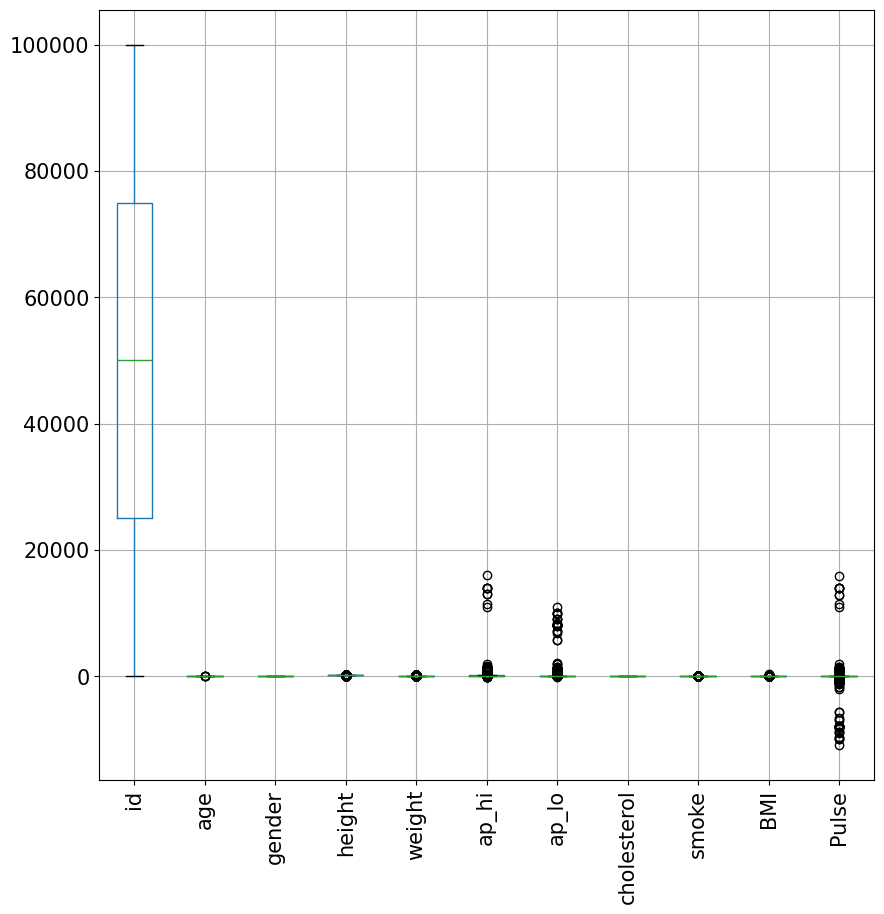

In [8]:
cardio_base.boxplot(rot=90, fontsize=15,figsize = (10,10))

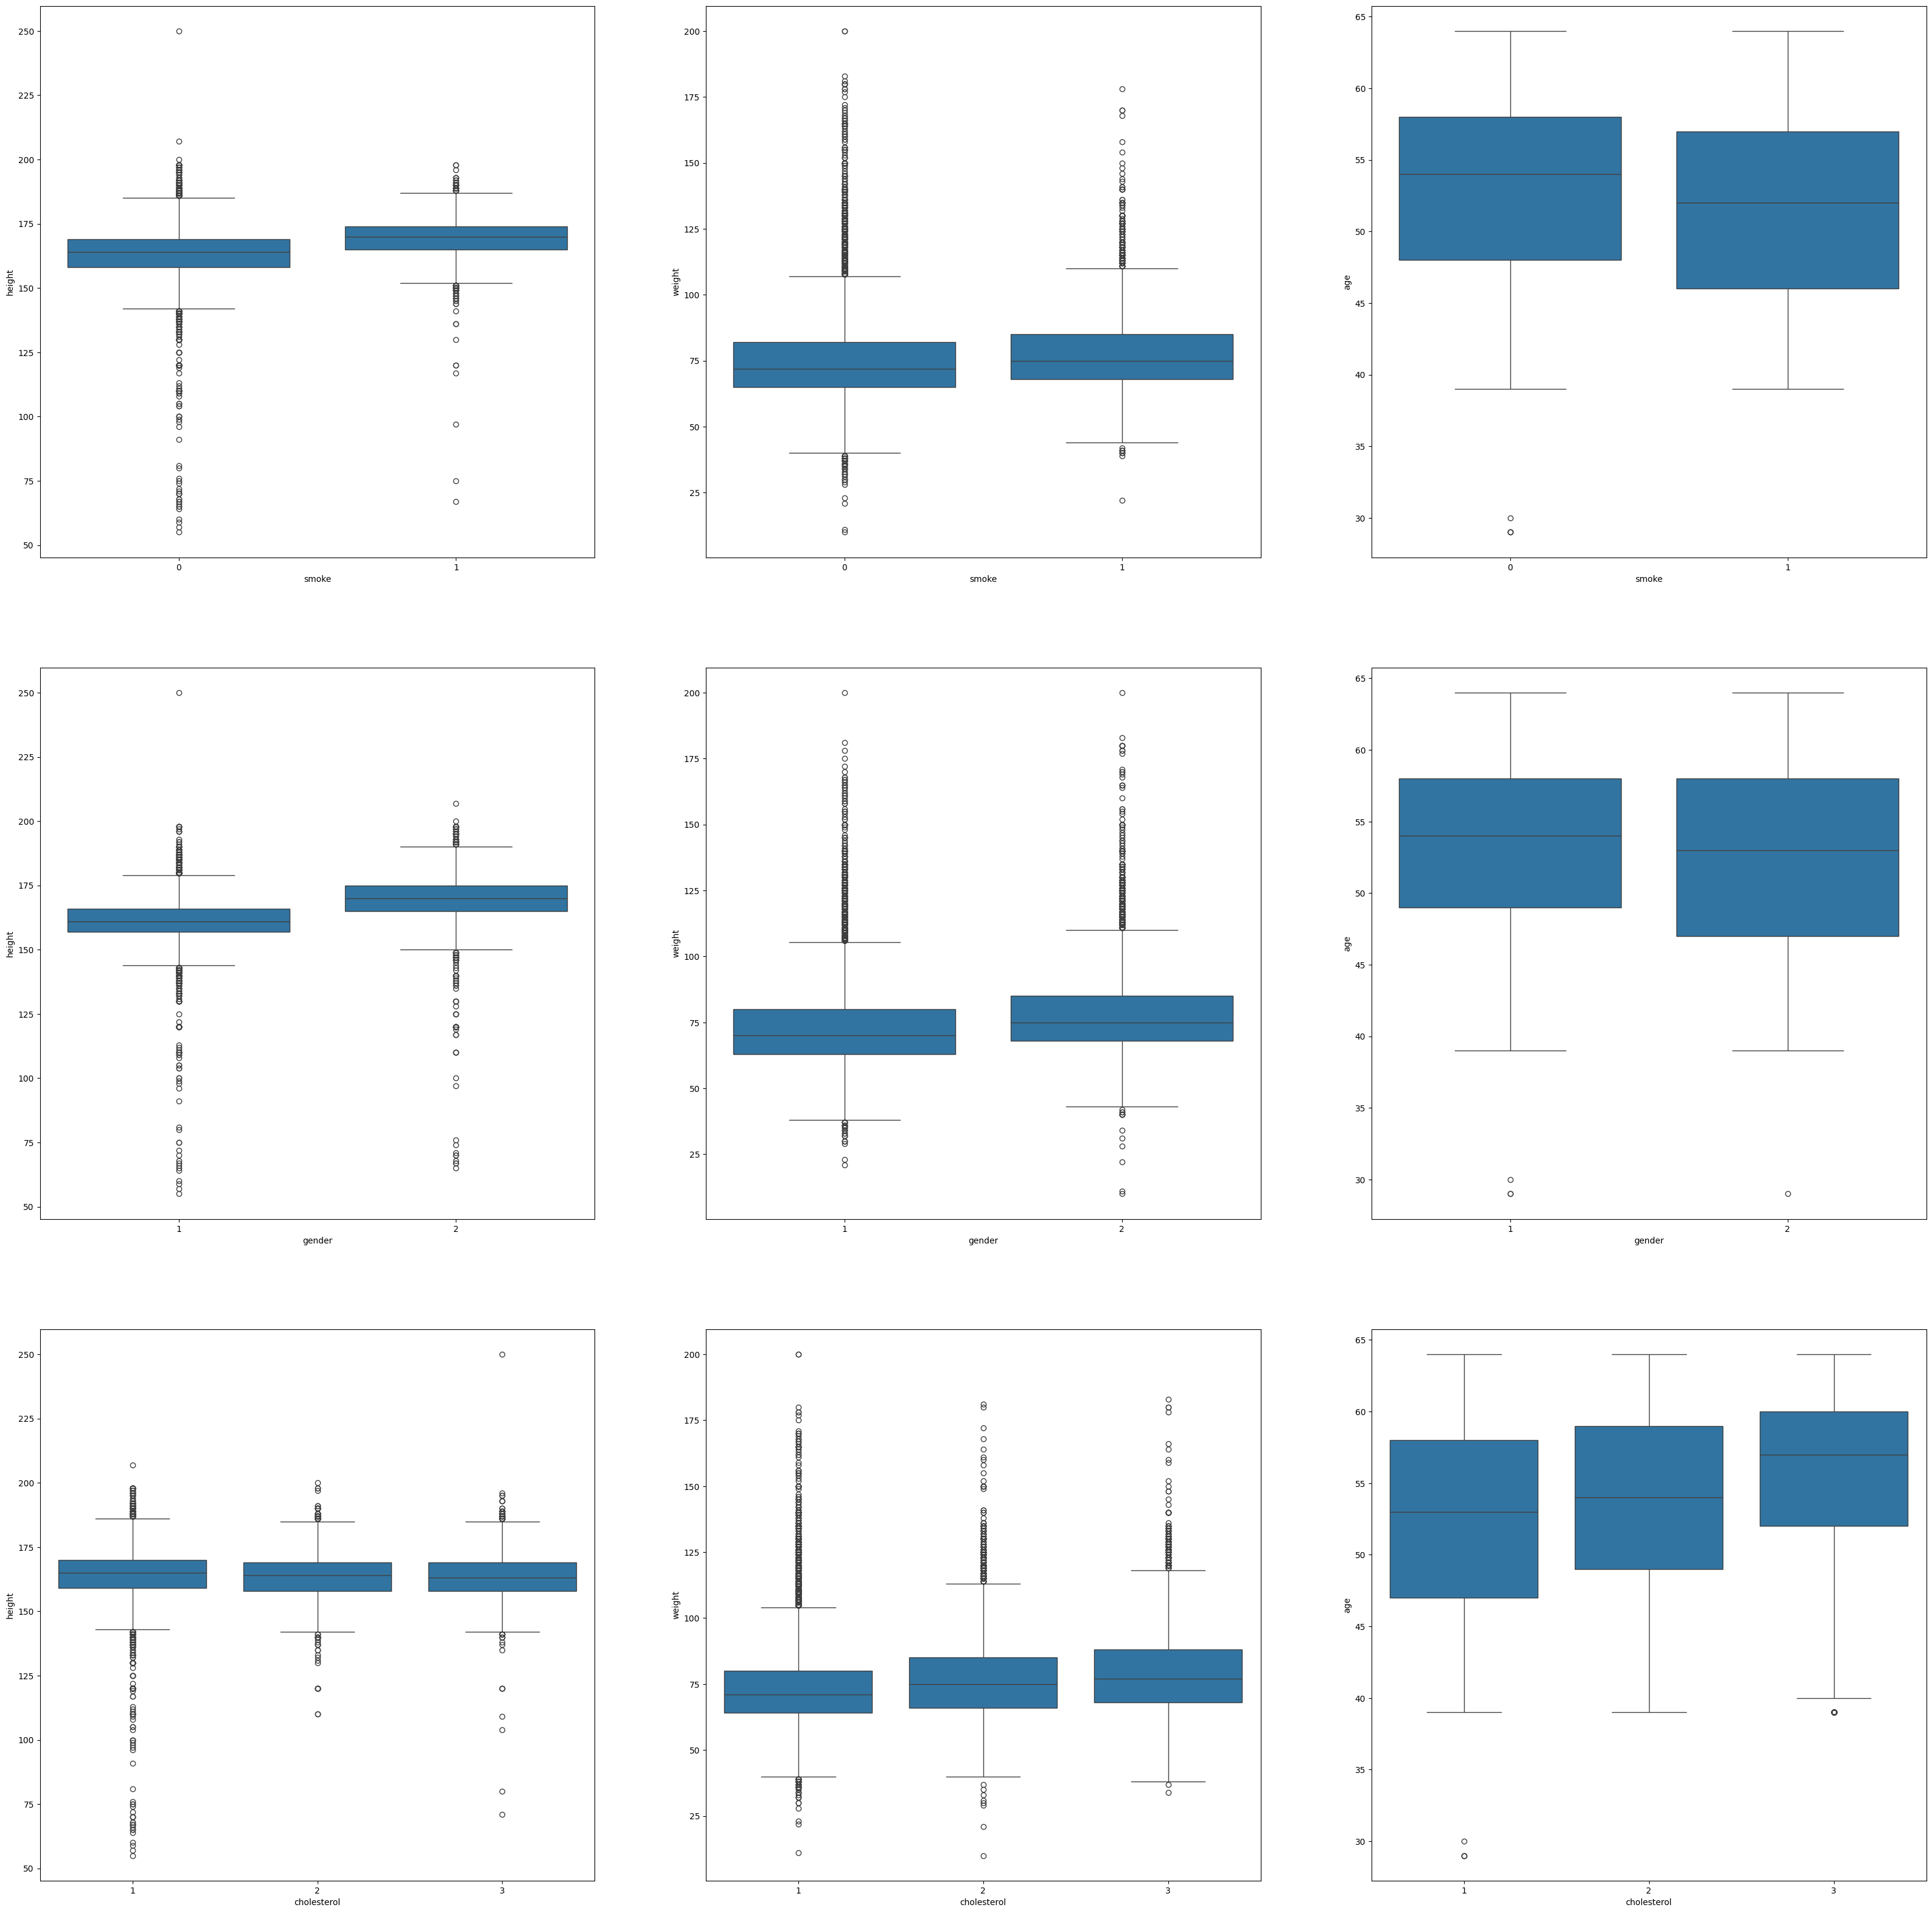

In [9]:
col = ['height', 'weight', 'age']
fig, axes = plt.subplots(3,3, figsize=(40,40))
for cl in col:
    num = col.index(cl)
    sns.boxplot(cardio_base, x='smoke', y=cl, ax=axes[0, num%4])
    sns.boxplot(cardio_base, x='gender', y=cl, ax=axes[1, num%4])
    sns.boxplot(cardio_base, x='cholesterol', y=cl, ax=axes[2,num % 4])

#### Analizar

##### Distribución de la información por atributo

In [10]:
cardio_base.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,BMI,Pulse
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129,27.556545,32.186871
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484,6.091405,241.469638
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000,3.470000,-10800.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000,23.880000,40.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000,26.375000,40.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000,30.220000,50.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000,298.670000,15940.000000


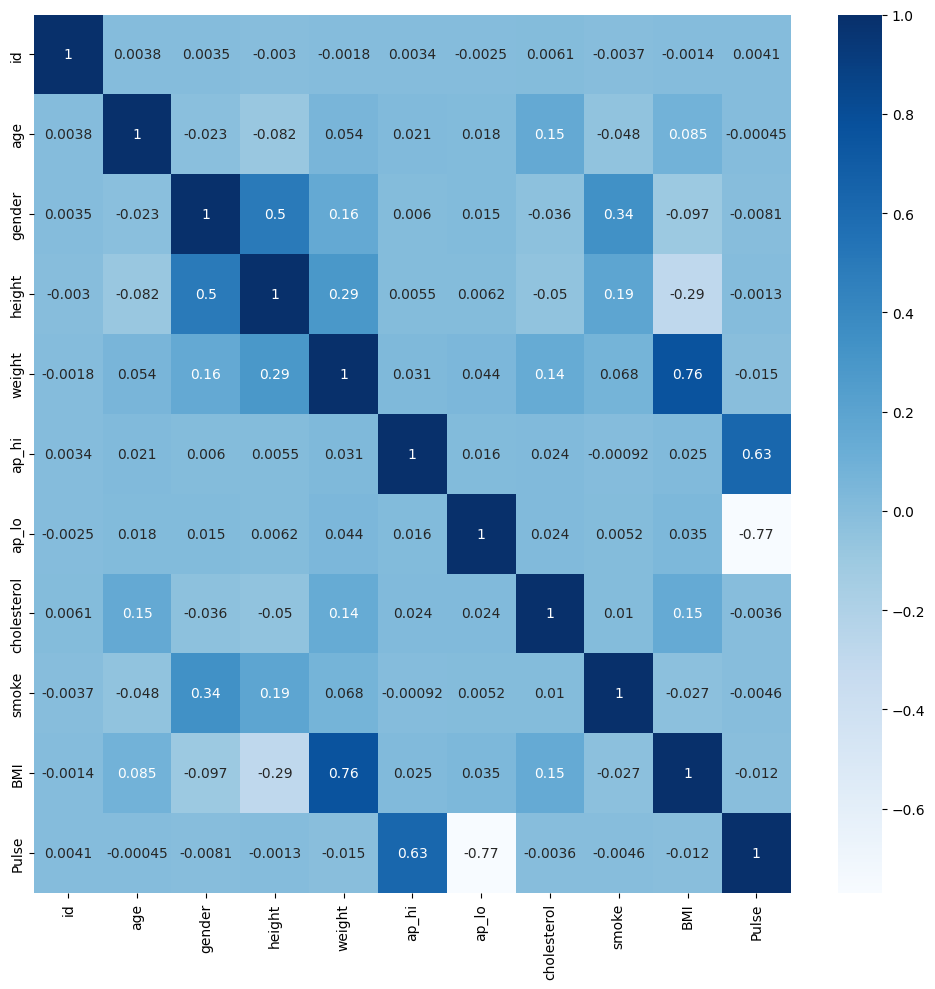

In [11]:
plt.figure(figsize=(10, 10))
correlation=cardio_base.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.tight_layout()

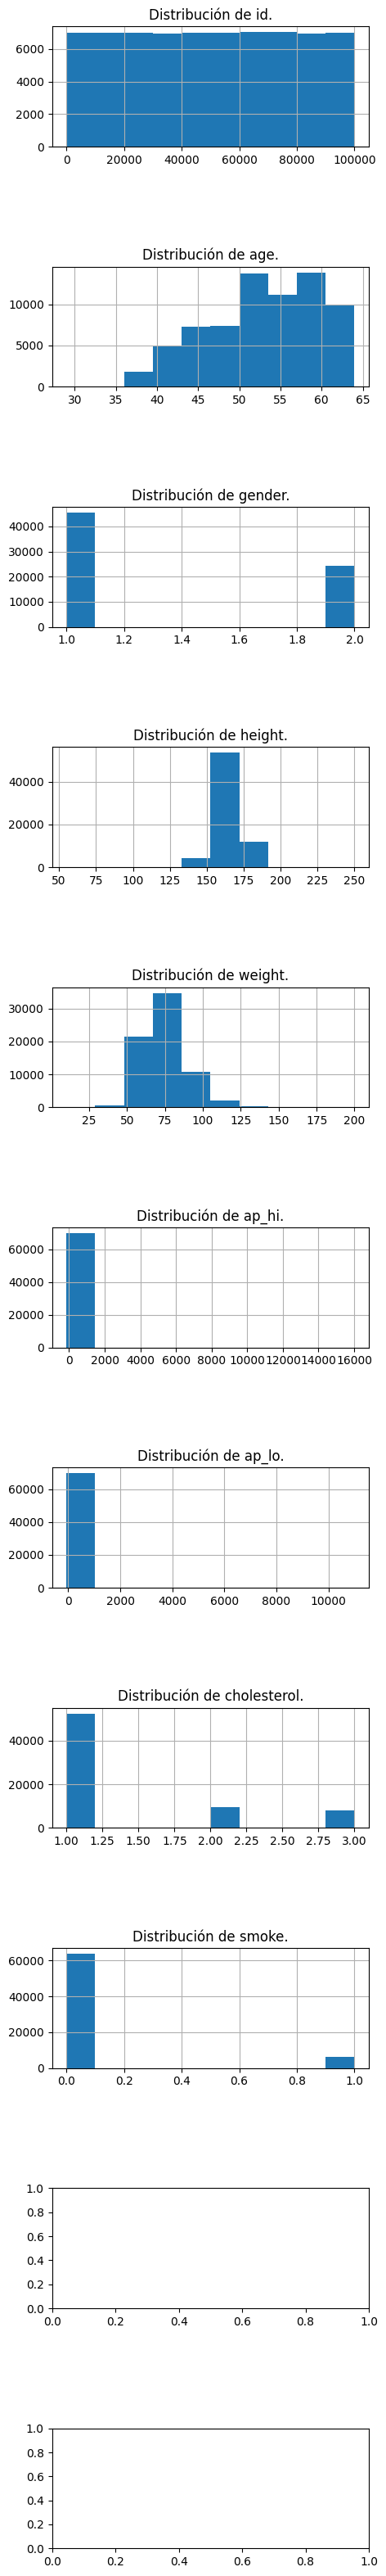

In [12]:
columnas = df.columns.values
fig, axs = plt.subplots(cardio_base.shape[1], 1, figsize = (5,40))
plt.subplots_adjust(hspace = 1)
for i, c in enumerate(columnas):
    dist_datos = cardio_base[c]
    axs[i].set_title(f'Distribución de {c}.')
    axs[i].hist(dist_datos)
    axs[i].grid(True)


#### Ejercicio

##### By how many percent is the max_abg_weight of each age group heavier than the min_avg_weight?

In [13]:
age_group_avg_weight = cardio_base.groupby('age')['weight'].mean()
# Calculate the percentage difference between max and min average weight for each age group
percentage_difference = ((age_group_avg_weight.max() - age_group_avg_weight.min()) / age_group_avg_weight.min()) * 100

print(f"Percentage difference between max and min average weight for each age group: {round(percentage_difference,3)} %")

Percentage difference between max and min average weight for each age group: 28.6 %


##### What is the shortest height of the top 1% tallest people?

In [14]:
# Determine the height threshold for the top 1% tallest individuals
top_1_percent_threshold = cardio_base['height'].quantile(0.99)

# Filter the DataFrame to include only individuals taller than the threshold
top_1_percent_tallest = cardio_base[cardio_base['height'] > top_1_percent_threshold]

# Find the shortest height among the top 1% tallest individuals
shortest_height_among_top_1_percent = top_1_percent_tallest['height'].min()

print("Shortest height among the top 1% tallest people:", shortest_height_among_top_1_percent)

Shortest height among the top 1% tallest people: 185


In [29]:
# Calculate the height threshold for the tallest 1% of people
tallest_1_percent_threshold = cardio_base['height'].quantile(0.99)

# Print the result
print("The height of the tallest 1% of people is:", tallest_1_percent_threshold, "centimeters.")

The height of the tallest 1% of people is: 184.0 centimeters.


##### What percentage of people are farther than 2 standard deviation from the average height?

In [15]:
# Calculate the average height
average_height = cardio_base['height'].mean()

# Calculate the standard deviation of the height
std_dev_height = cardio_base['height'].std()

# Determine the height threshold corresponding to 2 standard deviations away from the mean
threshold_height = average_height + 2 * std_dev_height

# Count the number of individuals whose height exceeds the threshold
count_farther_than_2std = cardio_base[cardio_base['height'] > threshold_height].shape[0]

# Calculate the percentage of individuals farther than 2 standard deviations from the average height
percentage_farther_than_2std = (count_farther_than_2std / cardio_base.shape[0]) * 100

print("Percentage of people farther than 2 standard deviations from the average height:", percentage_farther_than_2std)

Percentage of people farther than 2 standard deviations from the average height: 2.0557142857142856


In [33]:
# Calculate the average height and standard deviation
avg_height = cardio_base['height'].mean()
std_dev_height = cardio_base['height'].std()

# Determine the range within which heights are considered "normal"
lower_bound = avg_height - 2 * std_dev_height
upper_bound = avg_height + 2 * std_dev_height

# Count the number of people whose height falls outside the "normal" range
num_outliers = cardio_base[(cardio_base['height'] < lower_bound) | (cardio_base['height'] > upper_bound)].shape[0]

# Calculate the total number of people
total_people = cardio_base.shape[0]

# Calculate the percentage of people whose height falls outside the "normal" range
percentage_outliers = (num_outliers / total_people) * 100

# Print the result
print("Percentage of people more than 2 standard deviations away from the average height:", percentage_outliers)


Percentage of people more than 2 standard deviations away from the average height: 3.3357142857142854


##### In order to know about the alcohol status of some people that indicated, we will merge the two datasets based on their id:

In [16]:
'''
Features:
id: An identifier for each individual in the dataset.
alco: Whether the individual consumes alcohol (0 for no, 1 for yes).
'''
cardio_alco = pd.read_csv("C:/Users/gaby9/Downloads/data/cardio_alco.csv", sep=';')
merge_df = pd.merge(cardio_base, cardio_alco, on='id') #Two tables joined by matching id
merge_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,BMI,Pulse,alco
0,44,40,1,159,60.0,110,70,1,0,23.73,40,0
1,45,56,1,160,73.0,130,85,1,0,28.52,45,0
2,46,60,2,173,82.0,140,90,3,0,27.40,50,0
3,47,55,1,163,55.0,120,80,1,0,20.70,40,0
4,49,50,2,175,95.0,120,80,1,0,31.02,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
56898,99949,57,1,178,69.0,130,90,1,0,21.78,40,0
56899,99950,53,2,155,76.0,130,90,1,0,31.63,40,0
56900,99951,61,2,170,72.0,120,80,1,0,24.91,40,0
56901,99952,42,2,165,66.0,120,80,1,0,24.24,40,0


##### How many people above age 50 are alcoholics? (merge the second csv file strictly on their id intersection)

In [17]:
# Filter the merged DataFrame to include only individuals above the age of 50 who are alcoholics
above_50_alcoholics = merge_df[(merge_df['age'] > 50) & (merge_df['alco'] == 1)]
# Count the number of people above age 50 who are alcoholics
num_above_50_alcoholics = above_50_alcoholics.shape[0]
print("Number of people above age 50 who are alcoholics:", num_above_50_alcoholics)

Number of people above age 50 who are alcoholics: 1810


In [39]:
# Filter the merged DataFrame to include only individuals over 50 years old who consume alcohol
above_50_alcoholics = merge_df[(merge_df['age'] > 50) & (merge_df['alco'] == 1)]

# Count the number of people above age 50 who are alcoholics
num_above_50_alcoholics = above_50_alcoholics.shape[0]
print("Number of people above age 50 who are alcoholics:", num_above_50_alcoholics)
# Count the total number of people above age 50
total_above_50 = merge_df[merge_df['age'] > 50].shape[0]

# Calculate the percentage of the population over 50 years old who consume alcohol
percentage_above_50_alcoholics = (num_above_50_alcoholics / total_above_50) * 100

# Print the result
print("Percentage of the population over 50 years old who consume alcohol:", percentage_above_50_alcoholics)

Number of people above age 50 who are alcoholics: 1810
Percentage of the population over 50 years old who consume alcohol: 4.908607691056028


In [28]:
# Umbral para considerar niveles de colesterol "altos"
umbral_colesterol_alto = 2  # Aquí podrías ajustar el umbral según tus criterios

# Contar el número de individuos con niveles de colesterol alto sobre y bajo los 50 años
count_over_50_high_cholesterol = cardio_base[(cardio_base['age'] > 50) & (cardio_base['cholesterol'] >= umbral_colesterol_alto)].shape[0]
count_under_50_high_cholesterol = cardio_base[(cardio_base['age'] <= 50) & (cardio_base['cholesterol'] >= umbral_colesterol_alto)].shape[0]

# Calcular el porcentaje de individuos con niveles de colesterol alto sobre y bajo los 50 años
percentage_over_50_high_cholesterol = (count_over_50_high_cholesterol / cardio_base[cardio_base['age'] > 50].shape[0]) * 100
percentage_under_50_high_cholesterol = (count_under_50_high_cholesterol / cardio_base[cardio_base['age'] <= 50].shape[0]) * 100

# Imprimir los resultados
print("Porcentaje de personas mayores de 50 años con niveles de colesterol alto:", percentage_over_50_high_cholesterol)
print("Porcentaje de personas menores o iguales a 50 años con niveles de colesterol alto:", percentage_under_50_high_cholesterol)

Porcentaje de personas mayores de 50 años con niveles de colesterol alto: 28.621487603305784
Porcentaje de personas menores o iguales a 50 años con niveles de colesterol alto: 18.793908629441624


##### What is the comparison between Men and Women that smoke? merge_df['smoke'] = {0:no, 1:yes}, merge_df['gender'] = {1:female, 2:male}

In [18]:
gender_counts = merge_df['gender'].value_counts()
gender_counts

gender
1    36949
2    19954
Name: count, dtype: int64

In [19]:
# Map numerical values of 'smoke' and 'gender' columns to categorical values
merge_df['smoke'] = merge_df['smoke'].map({0: 'No', 1: 'Yes'})
merge_df['gender'] = merge_df['gender'].map({1: 'Female', 2: 'Male'})

# Group the DataFrame by 'gender' and 'smoke' columns and count occurrences
smoking_comparison = merge_df.groupby(['gender', 'smoke']).size().unstack(fill_value=0)

print("Comparison of smoking habits between men and women:")
print(smoking_comparison)

Comparison of smoking habits between men and women:
smoke      No   Yes
gender             
Female  36274   675
Male    15590  4364


In [50]:
# Map numerical values of 'smoke' column to categorical values
cardio_base['smoke'] = cardio_base['smoke'].map({0: 'No', 1: 'Yes'})

# Group the DataFrame by 'Pulse' and 'smoke' columns and count occurrences
smoking_pulse_comparison = cardio_base.groupby(['Pulse', 'smoke']).size().unstack(fill_value=0)

print("Comparison of smoking habits based on Pulse values:")
print(smoking_pulse_comparison)


Comparison of smoking habits based on Pulse values:
smoke   No  Yes
Pulse          
-10800   1    0
-9860    1    0
-9850    1    0
-9840    1    0
-9670    1    0
...     ..  ...
 11410   1    0
 12930   2    0
 13930   2    0
 13940   2    0
 15940   1    0

[305 rows x 2 columns]


In [20]:
print(f'The age unique values are: \n',merge_df['age'].unique(), merge_df['age'].nunique())

The age unique values are: 
 [40 56 60 55 50 49 64 54 58 47 46 43 53 39 59 62 52 57 61 45 63 51 42 44
 48 41 29 30] 28


Which tow features have the highest spearman rank correlation?

In [31]:
# Calculate Spearman rank correlation matrix
spearman_corr = cardio_base.corr(method='spearman')

# Exclude self-correlation and duplicate correlations
spearman_corr = spearman_corr.mask(np.tril(np.ones(spearman_corr.shape, dtype=bool)))

# Find the pair of features with the highest Spearman rank correlation
max_corr_pair = spearman_corr.abs().stack().idxmax()
max_corr_features = [max_corr_pair[0], max_corr_pair[1]]
max_corr_value = spearman_corr.loc[max_corr_pair]

# Print the results
print("Features with the highest Spearman rank correlation:")
print(max_corr_features[0], "and", max_corr_features[1], "with a correlation coefficient of", max_corr_value)

Features with the highest Spearman rank correlation:
weight and BMI with a correlation coefficient of 0.8481958437155753


In [32]:
# Calculate Spearman rank correlation matrix
spearman_corr = cardio_base[['ap_hi', 'ap_lo', 'age', 'weight', 'gender', 'height']].corr(method='spearman')

# Exclude self-correlation and duplicate correlations
spearman_corr = spearman_corr.mask(np.tril(np.ones(spearman_corr.shape, dtype=bool)))

# Find the pair of features with the highest Spearman rank correlation
max_corr_pair = spearman_corr.abs().stack().idxmax()
max_corr_features = [max_corr_pair[0], max_corr_pair[1]]
max_corr_value = spearman_corr.loc[max_corr_pair]

# Print the results
print("Features with the highest Spearman rank correlation:")
print(max_corr_features[0], "and", max_corr_features[1], "with a correlation coefficient of", max_corr_value)

Features with the highest Spearman rank correlation:
ap_hi and ap_lo with a correlation coefficient of 0.7354361051379777


#### Data Visualization

In [21]:
merge_df_ = merge_df.copy()
merge_df_['gender'].replace({1: 'Female', 2: 'Male'}, inplace=True)
merge_df_['smoke'].replace({0:'No', 1:'Yes'}, inplace=True)

C:\Users\gaby9\AppData\Local\Temp\ipykernel_8732\4148848552.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_df_['gender'].replace({1: 'Female', 2: 'Male'}, inplace=True)
C:\Users\gaby9\AppData\Local\Temp\ipykernel_8732\4148848552.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

gender
Male      4364
Female     675
Name: count, dtype: int64


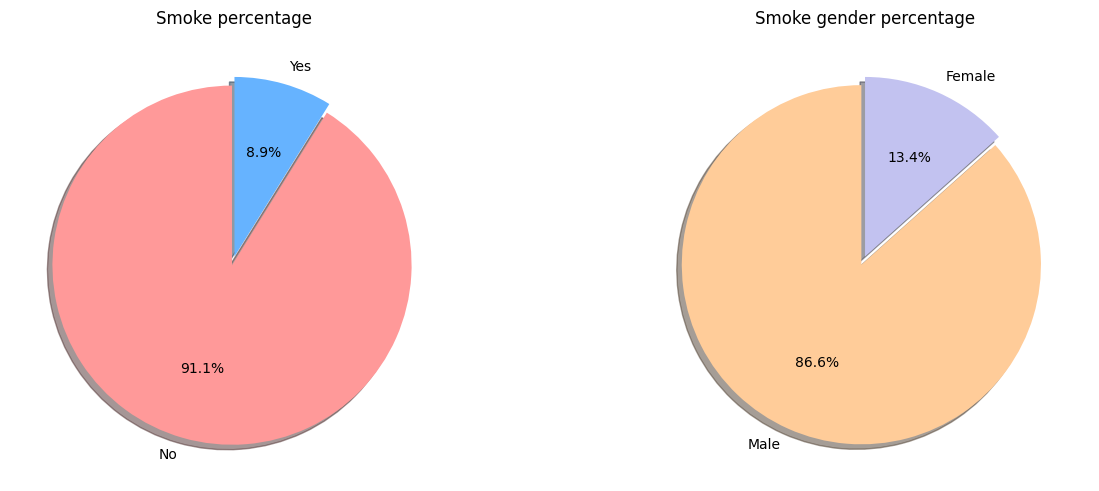

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(14, 20))
plt.tight_layout(pad=10)

# Custom color palettes
smoke_colors = ['#ff9999', '#66b3ff']
gender_colors = ['#ffcc99', '#c2c2f0']

# Pie chart for Cardio percentage
smoke_counts = merge_df_['smoke'].value_counts()
ax[0].pie(x=smoke_counts, labels=smoke_counts.index, autopct='%1.1f%%', shadow=True, startangle=90, colors=smoke_colors, explode=(0.05, 0.0))
ax[0].set_title('Smoke percentage')

# Pie chart for Cardiovascular patients gender percentage
gender_counts = merge_df_[merge_df_['smoke'] == 'Yes']['gender'].value_counts()
print(gender_counts)
ax[1].pie(x=gender_counts, labels=gender_counts.index, autopct='%1.1f%%', shadow=True, startangle=90, colors=gender_colors, explode=(0.05, 0.0))
ax[1].set_title('Smoke gender percentage')
plt.show()

In [23]:
merge_df_['cholesterol']=merge_df_['cholesterol'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal' })

In [24]:
cholesterol_counts2 = merge_df_['cholesterol'].value_counts()
cholesterol_counts2

cholesterol
normal               42544
above normal          7785
well above normal     6574
Name: count, dtype: int64

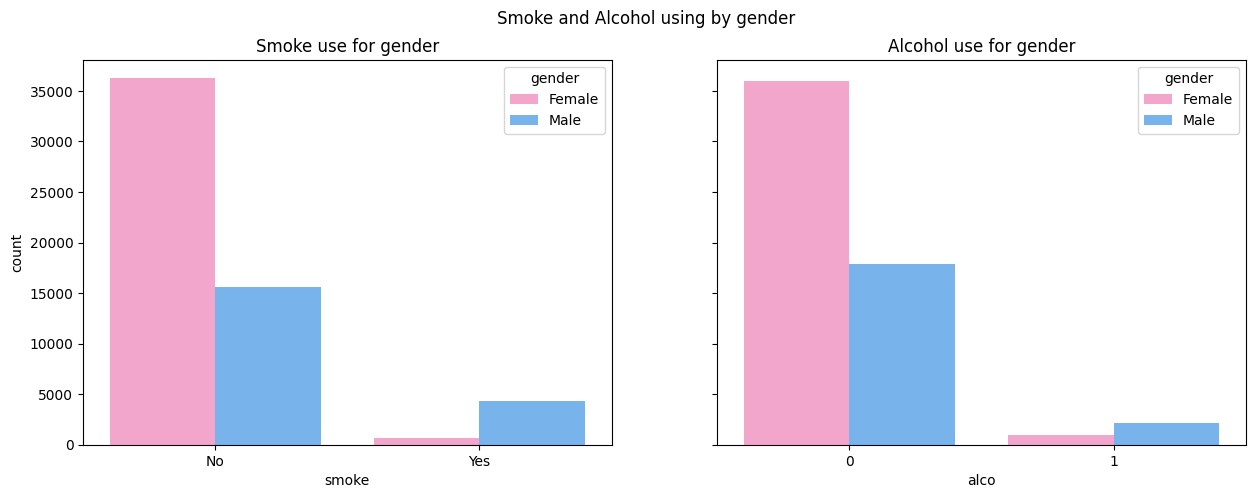

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Smoke and Alcohol using by gender')

sns.countplot(ax=axes[0], x=merge_df_.smoke,hue=merge_df_.gender,palette=colors)
axes[0].set_title("Smoke use for gender")


sns.countplot(ax=axes[1], x=merge_df_.alco,hue=merge_df_.gender,palette=colors)
axes[1].set_title("Alcohol use for gender")
plt.show()